# Statistička analiza parametara Spotify pesama

### Uvod

Analiziram >1M Spotify numera (2000–2023) sa metapodacima o popularnosti, žanru i audio osobinama. (https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks/data)

Cilj je da:
- prikažem deskriptivnu statistiku i vizuelizujem raspodele ključnih numeričkih mera (npr. popularity, danceability, tempo, loudness, valence) 
- ispitam veze između kategorija i popularnosti. 


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [133]:
df = pd.read_csv("spotify_data.csv", index_col=0)

| Kolona            | Opis |
|-------------------|------|
| Popularity        | Popularnost pesme (0 do 100) |
| Year              | Godina objavljivanja (2000 do 2023) |
| Danceability      | Pogodnost pesme za ples (0.0 do 1.0) |
| Energy            | Perceptivna mera intenziteta i aktivnosti (0.0 do 1.0) |
| Key               | Tonalitet pesme (od -1 do 11) |
| Loudness          | Ukupna glasnoća pesme u decibelima (-60 do 0 dB) |
| Mode              | Modalitet pesme (Dur = 1 / Mol = 0) |
| Speechiness       | Prisustvo govora u pesmi |
| Acousticness      | Vrednost poverenja (0 do 1) da je pesma akustična |
| Instrumentalness  | Da li pesma sadrži vokale (0.0 do 1.0) |
| Liveness          | Prisustvo publike u snimku (0.0 do 1.0) |
| Valence           | Pozitivnost raspoloženja pesme (0.0 do 1.0) |
| Tempo             | Tempo pesme u otkucajima u minuti (BPM) |
| Time_signature    | Broj otkucaja u taktu (3 do 7) |
| Duration_ms       | Trajanje pesme u milisekundama |


In [134]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 0 to 1473395
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  tempo

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00
mean,18.38,2011.96,0.54,0.64,5.29,-8.98,0.63,0.09,0.32,0.25,0.22,0.46,121.38,249561.78,3.89
std,15.89,6.80,0.18,0.27,3.56,5.68,0.48,0.13,0.35,0.37,0.20,0.27,29.78,149426.16,0.47
min,0.00,2000.00,0.00,0.00,0.00,-58.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2073.00,0.00
25%,5.00,2006.00,0.41,0.45,2.00,-10.83,0.00,0.04,0.01,0.00,0.10,0.23,98.80,181091.00,4.00
50%,15.00,2012.00,0.55,0.69,5.00,-7.45,1.00,0.05,0.15,0.00,0.13,0.44,121.93,225744.00,4.00
75%,29.00,2018.00,0.68,0.87,8.00,-5.28,1.00,0.09,0.64,0.61,0.29,0.67,139.90,286913.50,4.00
max,100.00,2023.00,0.99,1.00,11.00,6.17,1.00,0.97,1.00,1.00,1.00,1.00,249.99,6000495.00,5.00


In [135]:
df.head(10)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.48,0.30,4,-10.06,1,0.04,0.69,0.00,0.12,0.14,133.41,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.57,0.45,3,-10.29,1,0.03,0.48,0.00,0.10,0.52,140.18,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.41,0.23,3,-13.71,1,0.03,0.34,0.00,0.09,0.14,139.83,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.39,0.25,10,-9.85,1,0.04,0.81,0.00,0.08,0.51,204.96,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.43,0.79,6,-5.42,0,0.03,0.07,0.02,0.11,0.22,171.86,244320,4
5,Chris Smither,What They Say,24NvptbNKGs6sPy1Vh1O0v,48,2012,acoustic,0.57,0.57,2,-6.42,1,0.03,0.69,0.00,0.09,0.96,83.40,166240,4
6,Matt Wertz,Walking in a Winter Wonderland,0BP7hSvLAG3URGrEvNNbGM,48,2012,acoustic,0.57,0.61,9,-8.20,1,0.03,0.01,0.00,0.07,0.36,121.08,152307,4
7,Green River Ordinance,Dancing Shoes,3Y6BuzQCg9p4yH347Nn8OW,45,2012,acoustic,0.59,0.42,7,-7.46,1,0.03,0.25,0.00,0.10,0.32,138.13,232373,4
8,Jason Mraz,Living in the Moment,3ce7k1L4EkZppZPz1EJWTS,44,2012,acoustic,0.65,0.63,7,-7.16,1,0.02,0.05,0.00,0.12,0.70,84.14,235080,4
9,Boyce Avenue,Heaven,2EKxmYmUdAVXlaHCnnW13o,58,2012,acoustic,0.62,0.28,8,-10.24,0,0.03,0.73,0.00,0.10,0.29,129.95,250063,4


Proverom praznih vrednosti (df.isnull().sum()), utvrđeno je da dataset nema NaN vrednosti – sve kolone su kompletne.

In [136]:
missing = df.isnull().sum().to_frame(name="Broj_NaN")
missing["Procenat"] = (missing["Broj_NaN"] / len(df)) * 100
missing

,Broj_NaN,Procenat
artist_name,15,0.00
track_name,1,0.00
track_id,0,0.00
popularity,0,0.00
year,0,0.00
genre,0,0.00
danceability,0,0.00
energy,0,0.00
key,0,0.00
loudness,0,0.00


## Deskriptivna analiza Spotify skupa podataka

U nastavku radim osnovne statistike i vizuelizacije:
- distribucije ključnih numeričkih karakteristika (`popularity`, `danceability`, `energy`, `valence`, `tempo`, `loudness`)
- analizu popularnosti žanrova kroz godine
- poređenja po kategorijama (`mode`, `time_signature`)
- trendove kroz vreme (`year`)
- korelacije između osobina

### Distribucije ključnih metrika

Histogrami daju osećaj o raspodeli vrednosti:
- `popularity` (0–100)
- `danceability`, `energy`, `valence` (0–1)
- `tempo` (BPM) i `loudness` (dB)


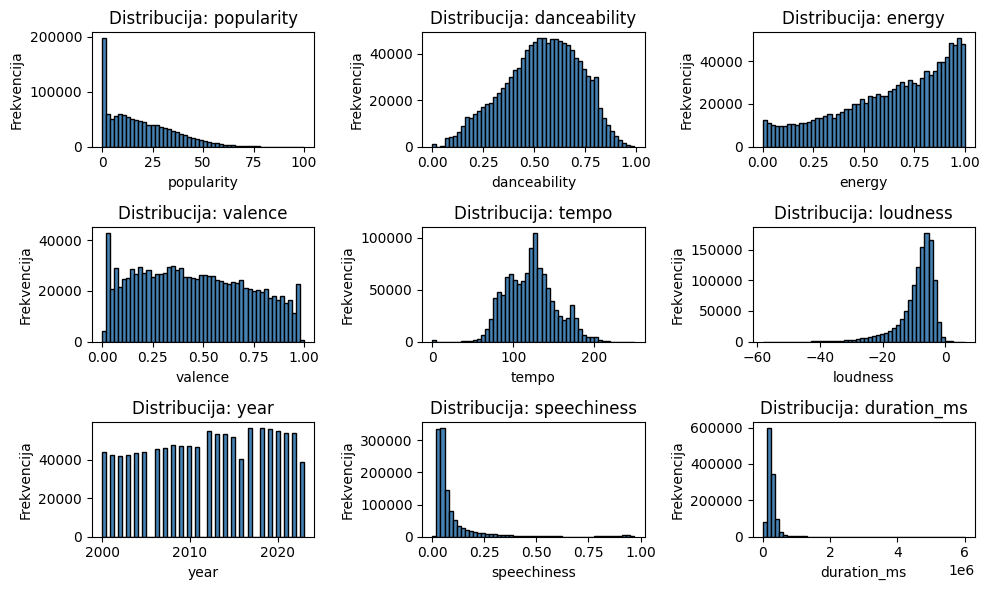

In [137]:
cols_simple = ["popularity", "danceability", "energy",
               "valence", "tempo", "loudness", "year", "speechiness", "duration_ms"]

fig, axes = plt.subplots(3, 3, figsize=(10, 6))  
axes = axes.flatten()

for ax, col in zip(axes, cols_simple):
    ax.hist(df[col], bins=50, edgecolor='black', color='steelblue')
    ax.set_title(f"Distribucija: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frekvencija")

plt.tight_layout()  
plt.show()

- **Popularity**: Većina pesama ima vrlo nisku popularnost (ispod 20), dok je veoma mali broj pesama izuzetno popularan. Distribucija je snažno asimetrična ulevo (right-skewed).  
- **Danceability**: Vrednosti su približno normalno raspoređene oko 0.6, što sugeriše da je većina pesama donekle pogodna za ples, dok ekstremno niske i visoke vrednosti ređe postoje.  
- **Energy**: Distribucija je “povučena” ka desnoj strani - mnogo je energičnih pesama, dok je mali deo vrlo tih i miran.  
- **Valence**: Prilično ravnomerna raspodela uz nešto više pesama pri vrlo niskoj pozitivnosti; znači da u katalogu ima dosta “mračnih” ili neutralnih pesama, ali i optimističnih.  
- **Tempo**: Najviše pesama je u rasponu 110–140 BPM (tipičan pop/dance tempo), a vrlo spore ili vrlo brze pesme su retke.  
- **Loudness**: Skoro sve pesme su u opsegu od -20 dB do 0 dB; ekstremno tihe pesme su retke, što ukazuje na konzistentan nivo masteringa.
- **Year** – Broj pesama po godinama nije ujednačen (poslednja godina ima manje zapisa), što može da „spušta“ proseke u trendovima.
- **Speechiness** – Veoma „težak“ rep ka malim vrednostima (većina pesama ima malo govora); visoke vrednosti su retke.
- **Duration_ms** – Jaka koncentracija oko standardnih trajanja (nekoliko minuta) i dugačak rep ka većim vrednostima.

Zaključak: skup pesama pokriva širok spektar karakteristika, ali distribucije nisu simetrične: za većinu osobina postoji “glavna masa” vrednosti i dugački repovi (posebno za popularnost i glasnoću).

### Boxplot-ovi za pregled outliera

Boxplot pomaže da vidimo outliere i uporedimo centralne tendencije:

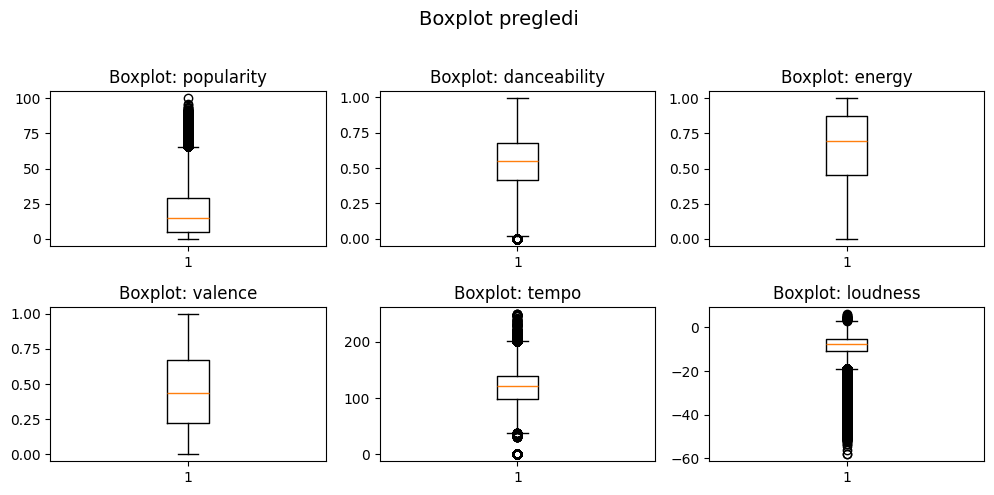

In [138]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

for ax, col in zip(axes, cols_simple):
    ax.boxplot(df[col], vert=True)
    ax.set_title(f"Boxplot: {col}")

for ax in axes[len(cols_simple):]:
    ax.axis("off")

fig.suptitle("Boxplot pregledi", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- **Popularity**: Većina pesama ima nisku popularnost (medijana ~15). Postoji mnogo outliera u gornjem delu (pesme sa >70 popularnosti), što potvrđuje da mali broj pesama dominira u broju preslušavanja.  
- **Danceability**: Raspodela je relativno uska - najveći deo pesama ima srednje do visoke vrednosti (0.4–0.8), uz par ekstremno niskih.  
- **Energy**: Većina pesama ima visoku energiju (medijana oko 0.7), sa nekoliko mirnijih numera (outlieri pri nuli).  
- **Valence**: Prilično ravnomeran raspon od 0 do 1; medijana ~0.4, što pokazuje da su zastupljene i “mračne” i “vedre” pesme.  
- **Tempo**: Koncentrisan između 90 i 150 BPM; postoji nešto outliera sa veoma sporim ili vrlo brzim tempom.  
- **Loudness**: Tipične vrednosti su između -20 i 0 dB; vidljivi su outlieri sa ekstremno niskom glasnoćom, ali najveći broj pesama ima sličan nivo glasnoće (što je očekivano zbog procesa masteringa).

Zaključak: većina atributa pokazuje relativno stabilan raspon, dok popularnost i glasnoća imaju izražene “repove” sa ekstremnim vrednostima (outlier-i), što je tipično za muzičke kataloge.


### Popularnost vs. muzičke osobine

Scatter dijagram + linearna aproksimacija (pravolinijska regresija) ilustruju trend.
Za performanse koristim uzorak (npr. 80k redova).


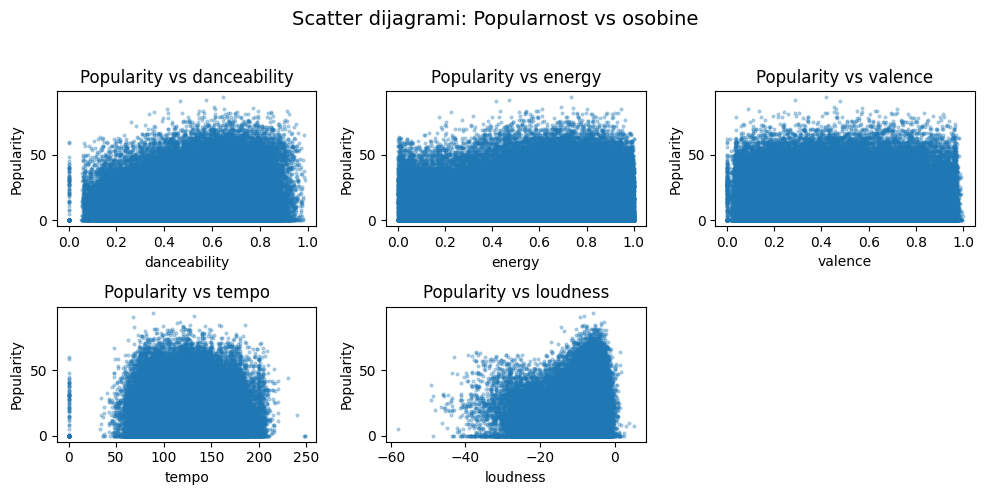

In [139]:
x_features = ["danceability", "energy", "valence", "tempo", "loudness"]
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

sample = df.sample(n=min(80_000, len(df)), random_state=0)

for ax, x in zip(axes, x_features):
    ax.scatter(sample[x], sample["popularity"], s=4, alpha=0.3)
    ax.set_xlabel(x)
    ax.set_ylabel("Popularity")
    ax.set_title(f"Popularity vs {x}")

for ax in axes[len(x_features):]:
    ax.axis("off")

fig.suptitle("Scatter dijagrami: Popularnost vs osobine", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- **Danceability / Energy / Valence**: Nema jasne linearne veze sa popularnošću. Pesme svih nivoa popularnosti javljaju se duž čitavog opsega ovih atributa, uz blagu tendenciju ka višoj popularnosti kod pesama sa umerenim do visokim vrednostima danceability-ja i energije.
- **Tempo**: Popularne pesme uglavnom su u intervalu 90–150 BPM, dok vrlo spori ili ekstremno brzi tempo retko dostiže veću popularnost.
- **Loudness**: Postoji vidljiv pozitivan odnos – pesme koje su glasnije (bliže 0 dB) češće imaju višu popularnost, dok tiši snimci retko dostižu popularnost veću od 40–50.

Zaključak: popularnost pesme nije strogo određena muzičkim karakteristikama, ali veća glasnoća i “umereni” tempo/danceability mogu blago doprineti većem broju preslušavanja.


In [140]:
q10   = df["popularity"].quantile(0.90)    # top 10%
q01   = df["popularity"].quantile(0.99)    # top 1%
q001  = df["popularity"].quantile(0.999)   # top 0.1%

top10   = df[df["popularity"] >= q10]
top01   = df[df["popularity"] >= q01]
top001  = df[df["popularity"] >= q001]

print(f"Prag popularnosti za top 10% pesama: {q10:.1f}")
print(f"Prag popularnosti za top 1% pesama: {q01:.1f}")
print(f"Prag popularnosti za top 0.1% pesama: {q001:.1f}")

Prag popularnosti za top 10% pesama: 41.0
Prag popularnosti za top 1% pesama: 62.0
Prag popularnosti za top 0.1% pesama: 76.0


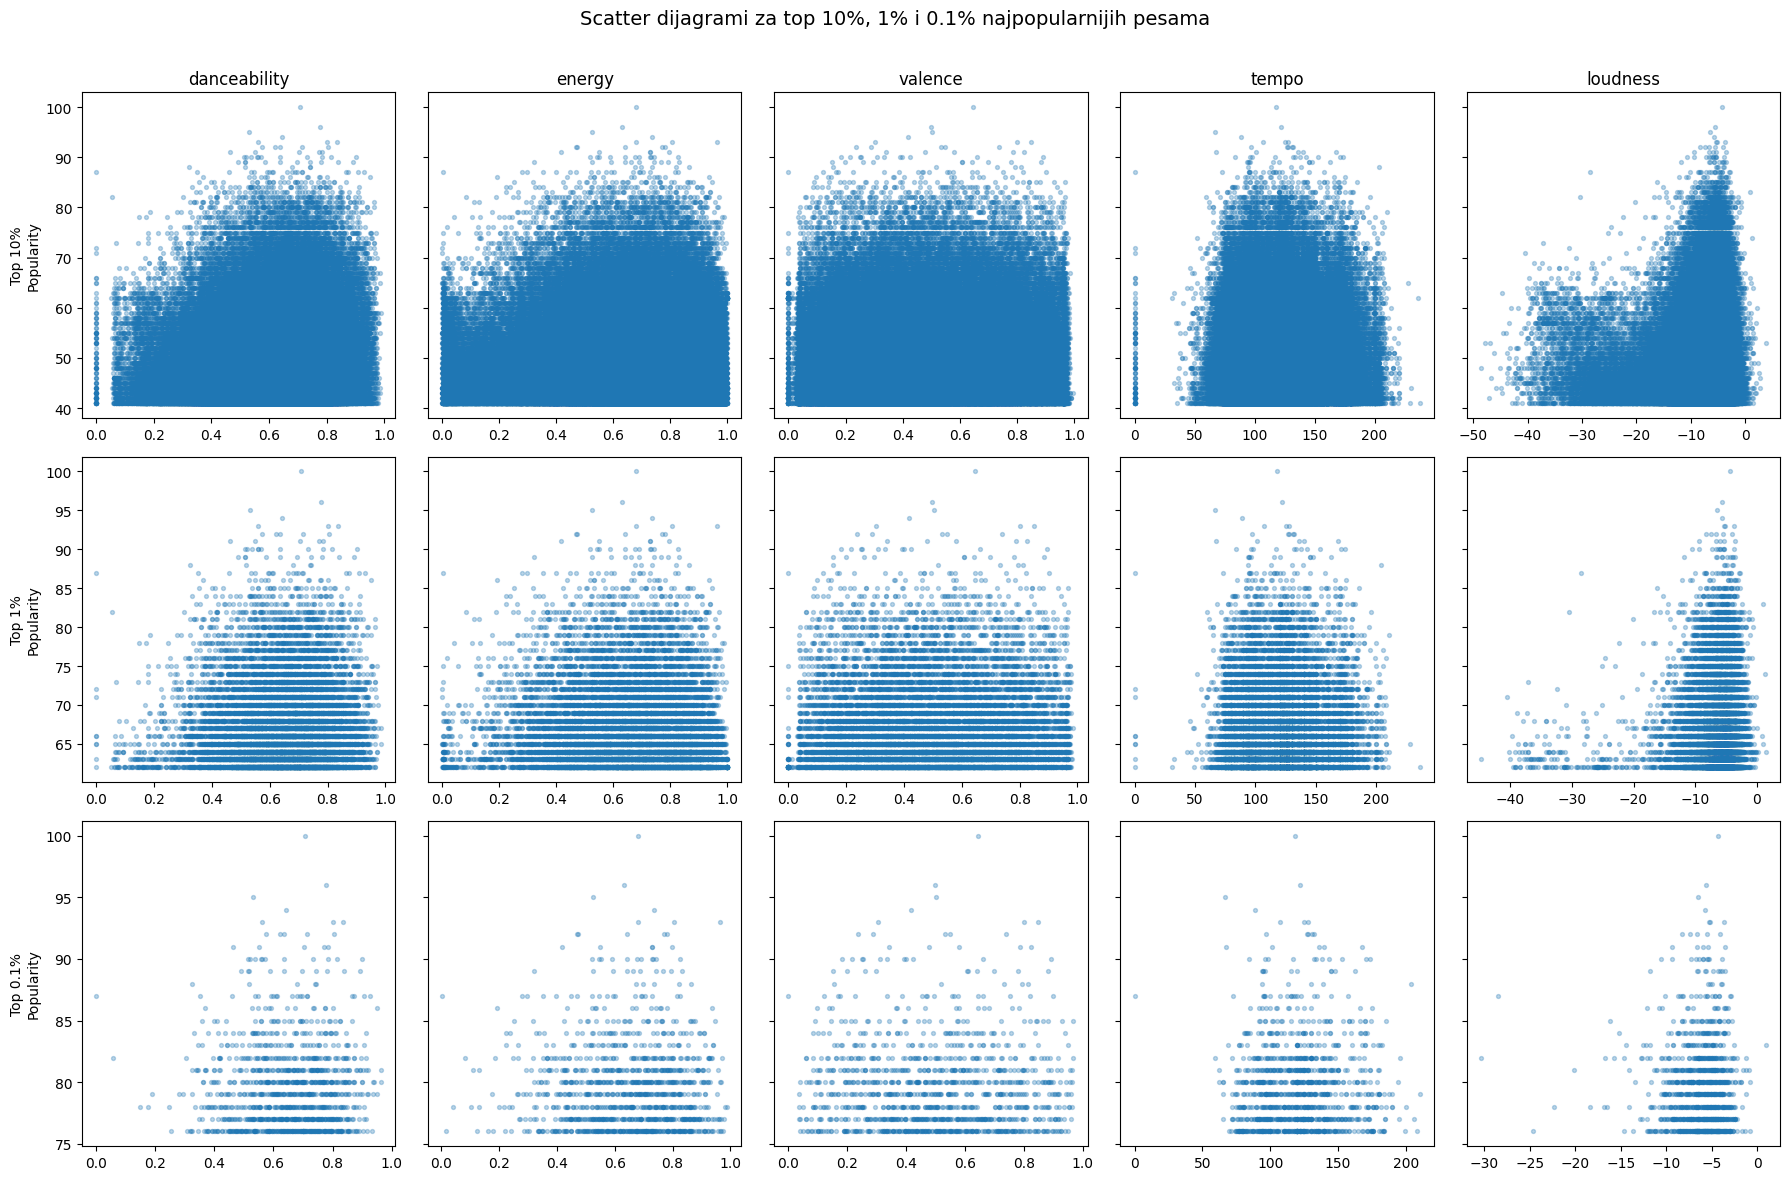

In [141]:
features = ["danceability", "energy", "valence", "tempo", "loudness"]

groups = {
    "Top 10%":  top10,
    "Top 1%":   top01,
    "Top 0.1%": top001
}

fig, axes = plt.subplots(3, len(features), figsize=(18, 12), sharey='row')

for row, (label, data) in enumerate(groups.items()):
    for col, feat in enumerate(features):
        ax = axes[row, col]
        ax.scatter(data[feat], data["popularity"], s=8, alpha=0.3)
        if row == 0:
            ax.set_title(feat)
        if col == 0:
            ax.set_ylabel(f"{label}\nPopularity")
        ax.set_xlabel("")

fig.suptitle("Scatter dijagrami za top 10%, 1% i 0.1% najpopularnijih pesama", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

- U svim nivoima popularnosti (**top 10, 1 i 0.1%**) nema snažne linearne veze između muzičkih osobina i popularnosti — pesme različitih vrednosti danceability-ja, energije, valence i tempa mogu postati vrlo popularne.
- Kod atributa **loudness** primećuje se jasan trend: što je pesma glasnija (bliže 0 dB), to je češće u grupama visoke popularnosti.
- **Tempo** kod najpopularnijih pesama uglavnom je u rasponu 90–150 BPM, dok ekstremno spor ili brz tempo retko ulazi u najuži vrh.
- **Danceability**, **energy** i **valence** imaju vrlo širok raspon čak i u top 0.1 %, što ukazuje da ovi atributi sami po sebi ne garantuju visoku popularnost.
- Kako prelazimo sa top 10 % → 1 % → 0.1 %, skup postaje sve manji i tačke se “čiste”, ali oblik distribucije ostaje sličan.

Zaključak: u najpopularnijem delu kataloga jedina osobina koja pokazuje konzistentnu povezanost sa popularnošću je **glasnoća**, dok ostale karakteristike ostaju raznovrsne i ne ograničavaju pesmu da bude hit.


### Trendovi kroz vreme

Prikazujem srednje vrednosti po godinama za: `danceability`, `energy`, `tempo`, `loudness`.

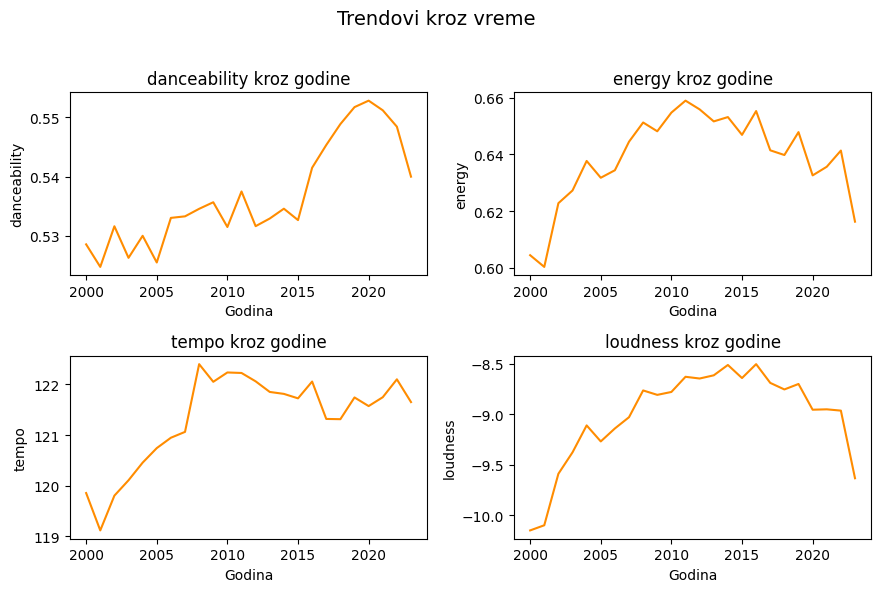

In [142]:
metrics = ["danceability", "energy", "tempo", "loudness"]
by_year = df.groupby("year")[metrics].mean()

fig, axes = plt.subplots(2, 2, figsize=(9, 6))
axes = axes.flatten()

for ax, m in zip(axes, metrics):
    ax.plot(by_year.index, by_year[m], color="darkorange")
    ax.set_title(f"{m} kroz godine")
    ax.set_xlabel("Godina")
    ax.set_ylabel(m)

for ax in axes[len(metrics):]:
    ax.axis("off")

fig.suptitle("Trendovi kroz vreme", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


- **Danceability**: Posle blagog rasta od 2000. do ~2015, od 2016. nadalje beleži se primetan skok, što znači da novije pesme postaju pogodnije za ples.
- **Energy**: Od 2000. do oko 2010. energija pesama značajno raste, potom se stabilizuje, a posle 2018. beleži se blagi pad.
- **Tempo**: U proseku ostaje stabilan (oko 120 BPM), uz kratkotrajne skokove početkom 2010-ih.
- **Loudness**: Jasno raste od početka 2000-ih do sredine 2010-ih (više “kompresovan” zvuk u masteringu), zatim blago opada.

Zaključak: Poslednjih godina produkcija favorizuje plesnije, nešto tiše, a manje “eksplozivne” pesme u poređenju sa periodom 2008–2015.

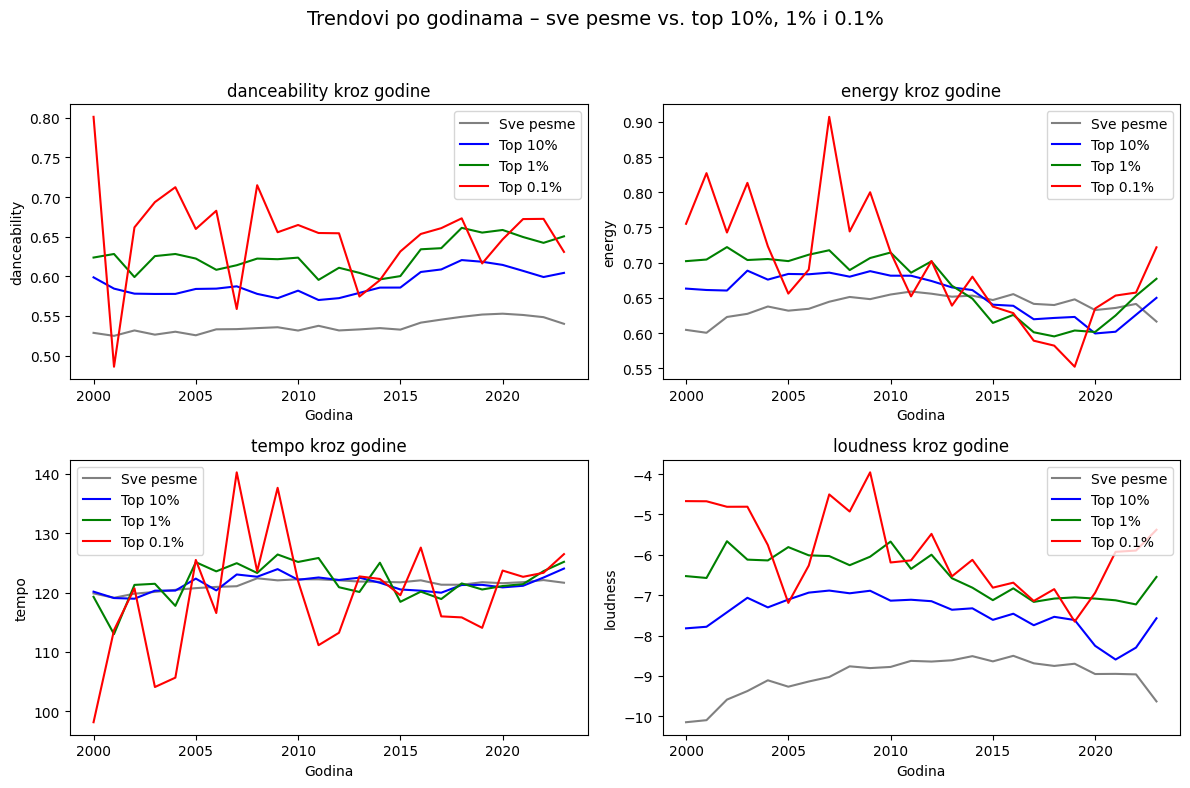

In [143]:
features = ["danceability", "energy", "tempo", "loudness"]

by_year_all   = df.groupby("year")[features].mean()
by_year_10    = top10.groupby("year")[features].mean()
by_year_1     = top01.groupby("year")[features].mean()
by_year_001   = top001.groupby("year")[features].mean()

groups = {
    "Sve pesme": by_year_all,
    "Top 10%":   by_year_10,
    "Top 1%":    by_year_1,
    "Top 0.1%":  by_year_001
}

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

colors = ["gray", "blue", "green", "red"]

for ax, feat in zip(axes, features):
    for color, (label, data) in zip(colors, groups.items()):
        if feat in data.columns:
            ax.plot(data.index, data[feat], label=label, color=color)
    ax.set_title(f"{feat} kroz godine")
    ax.set_xlabel("Godina")
    ax.set_ylabel(feat)
    ax.legend()

fig.suptitle("Trendovi po godinama – sve pesme vs. top 10%, 1% i 0.1%", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Analiza po žanrovima

- **Apsolutna popularnost (`abs_pop`)**  
  To je prosečna vrednost originalne kolone `popularity` za dati žanr u određenoj godini.  
  Računa se kao aritmetička sredina svih pesama tog žanra u toj godini:

  $$
  \text{abs\_pop}(g, y)
     = \frac{1}{n_{g,y}}
        \sum_{i=1}^{n_{g,y}} \text{popularity}_i
  $$

---

- **Relativna popularnost (`rel_pop`)**  
  Pokazuje koliko su pesme žanra popularne u odnosu na prosek svih pesama u istoj godini.  
  Prvo se za svaku pesmu računa:

  $$
  \text{rel\_popularity}_i
     = \frac{\text{popularity}_i}
            {\text{mean(popularity u istoj godini)}}
  $$

  Zatim, za svaki žanr i godinu, uzima se prosek tih relativnih vrednosti:

  $$
  \text{rel\_pop}(g, y)
     = \frac{1}{n_{g,y}}
        \sum_{i=1}^{n_{g,y}} \text{rel\_popularity}_i
  $$

---

**Zašto koristiti obe metrike:**

- *Apsolutna* pokazuje stvarne vrednosti popularnosti (0–100), korisna za poređenje stvarnih streamova.  
- *Relativna* uklanja uticaj neravnomernog broja zapisa po godinama i pokazuje koliko je žanr bio “iznad proseka” svoje godine.

In [144]:
df_gen = df.copy()

df_gen["rel_popularity"] = (
    df_gen.groupby("year")["popularity"]
          .transform(lambda x: x / x.mean())
)

pop_by_year_genre = (
    df_gen.groupby(["year", "genre"])
          .agg(
              abs_pop=("popularity", "mean"),       
              rel_pop=("rel_popularity", "mean")   
          )
          .reset_index()
)

pivot_abs = pop_by_year_genre.pivot(index="year", columns="genre", values="abs_pop")
pivot_rel = pop_by_year_genre.pivot(index="year", columns="genre", values="rel_pop")

In [145]:
N = 5

top_abs = (
    pop_by_year_genre
      .sort_values(["year", "abs_pop"], ascending=[True, False])
      .groupby("year")
      .head(N)
)

top_rel = (
    pop_by_year_genre
      .sort_values(["year", "rel_pop"], ascending=[True, False])
      .groupby("year")
      .head(N)
)

display(top_abs.query("year == 2000").reset_index(drop=True))
display(top_rel.query("year == 2000").reset_index(drop=True))

display(top_abs.query("year == 2022").reset_index(drop=True))
display(top_rel.query("year == 2022").reset_index(drop=True))


,year,genre,abs_pop,rel_pop
0,2000,sad,61.00,5.68
1,2000,pop,44.90,4.18
2,2000,rock,40.95,3.81
3,2000,alt-rock,33.76,3.14
4,2000,metal,33.33,3.10


,year,genre,abs_pop,rel_pop
0,2000,sad,61.00,5.68
1,2000,pop,44.90,4.18
2,2000,rock,40.95,3.81
3,2000,alt-rock,33.76,3.14
4,2000,metal,33.33,3.10


,year,genre,abs_pop,rel_pop
0,2022,pop,70.91,2.28
1,2022,hip-hop,60.40,1.94
2,2022,dance,60.23,1.94
3,2022,rock,54.97,1.77
4,2022,house,53.92,1.73


,year,genre,abs_pop,rel_pop
0,2022,pop,70.91,2.28
1,2022,hip-hop,60.40,1.94
2,2022,dance,60.23,1.94
3,2022,rock,54.97,1.77
4,2022,house,53.92,1.73


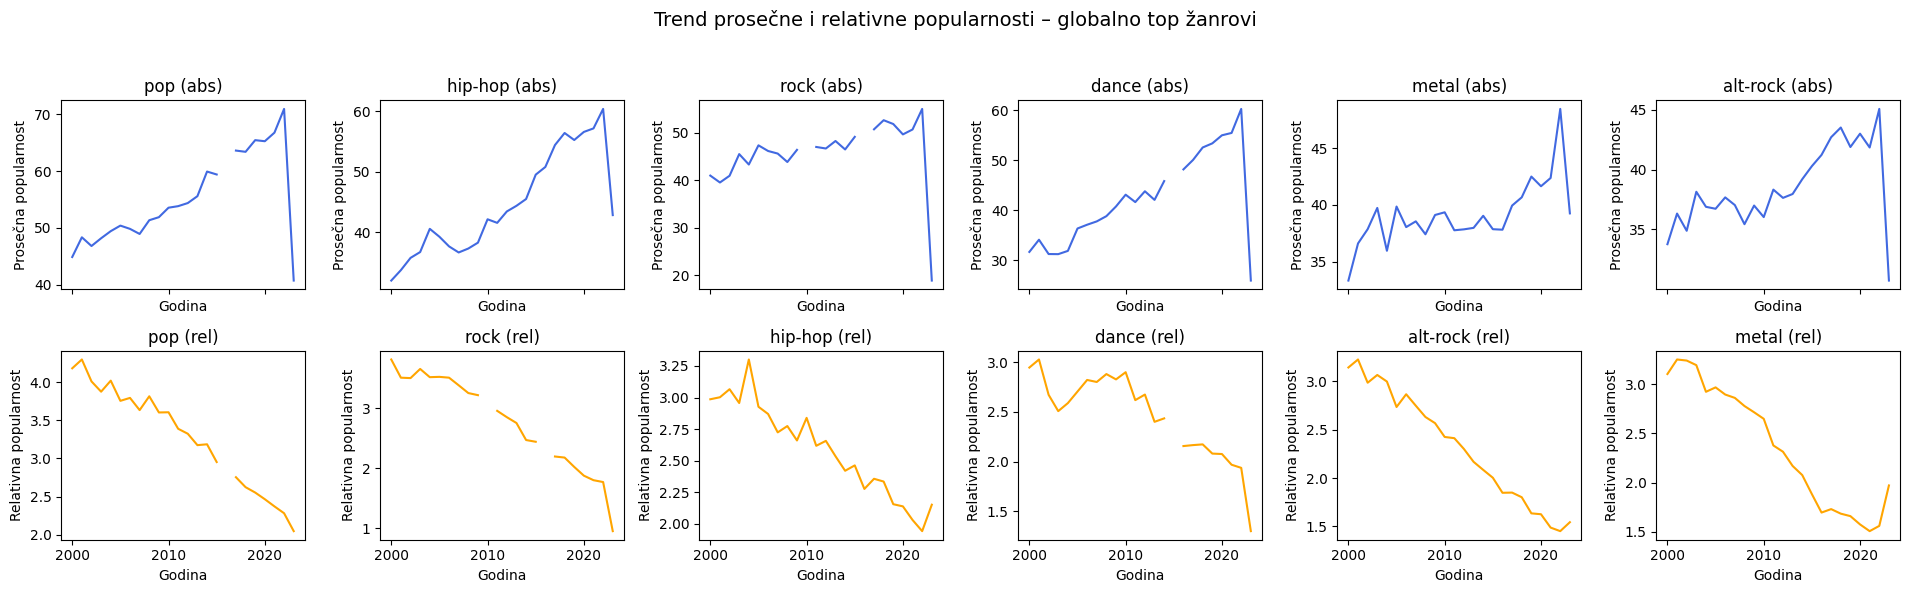

In [146]:
K = 6

# GLOBALNO NAJPOPULARNIJI ŽANROVI (za sve godine)
global_top_abs = (
    df_gen.groupby("genre")["popularity"].mean()
          .sort_values(ascending=False)
          .head(K)
          .index.tolist()
)

global_top_rel = (
    df_gen.groupby("genre")["rel_popularity"].mean()
          .sort_values(ascending=False)
          .head(K)
          .index.tolist()
)

pivot_abs_top = pivot_abs[global_top_abs]
pivot_rel_top = pivot_rel[global_top_rel]

fig, axes = plt.subplots(2, K, figsize=(3.2*K, 6), sharex=True)

for i, g in enumerate(global_top_abs):
    axes[0, i].plot(pivot_abs_top.index, pivot_abs_top[g], color="royalblue")
    axes[0, i].set_title(f"{g} (abs)")
    axes[0, i].set_xlabel("Godina")
    axes[0, i].set_ylabel("Prosečna popularnost")

for i, g in enumerate(global_top_rel):
    axes[1, i].plot(pivot_rel_top.index, pivot_rel_top[g], color="orange")
    axes[1, i].set_title(f"{g} (rel)")
    axes[1, i].set_xlabel("Godina")
    axes[1, i].set_ylabel("Relativna popularnost")

fig.suptitle("Trend prosečne i relativne popularnosti – globalno top žanrovi", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


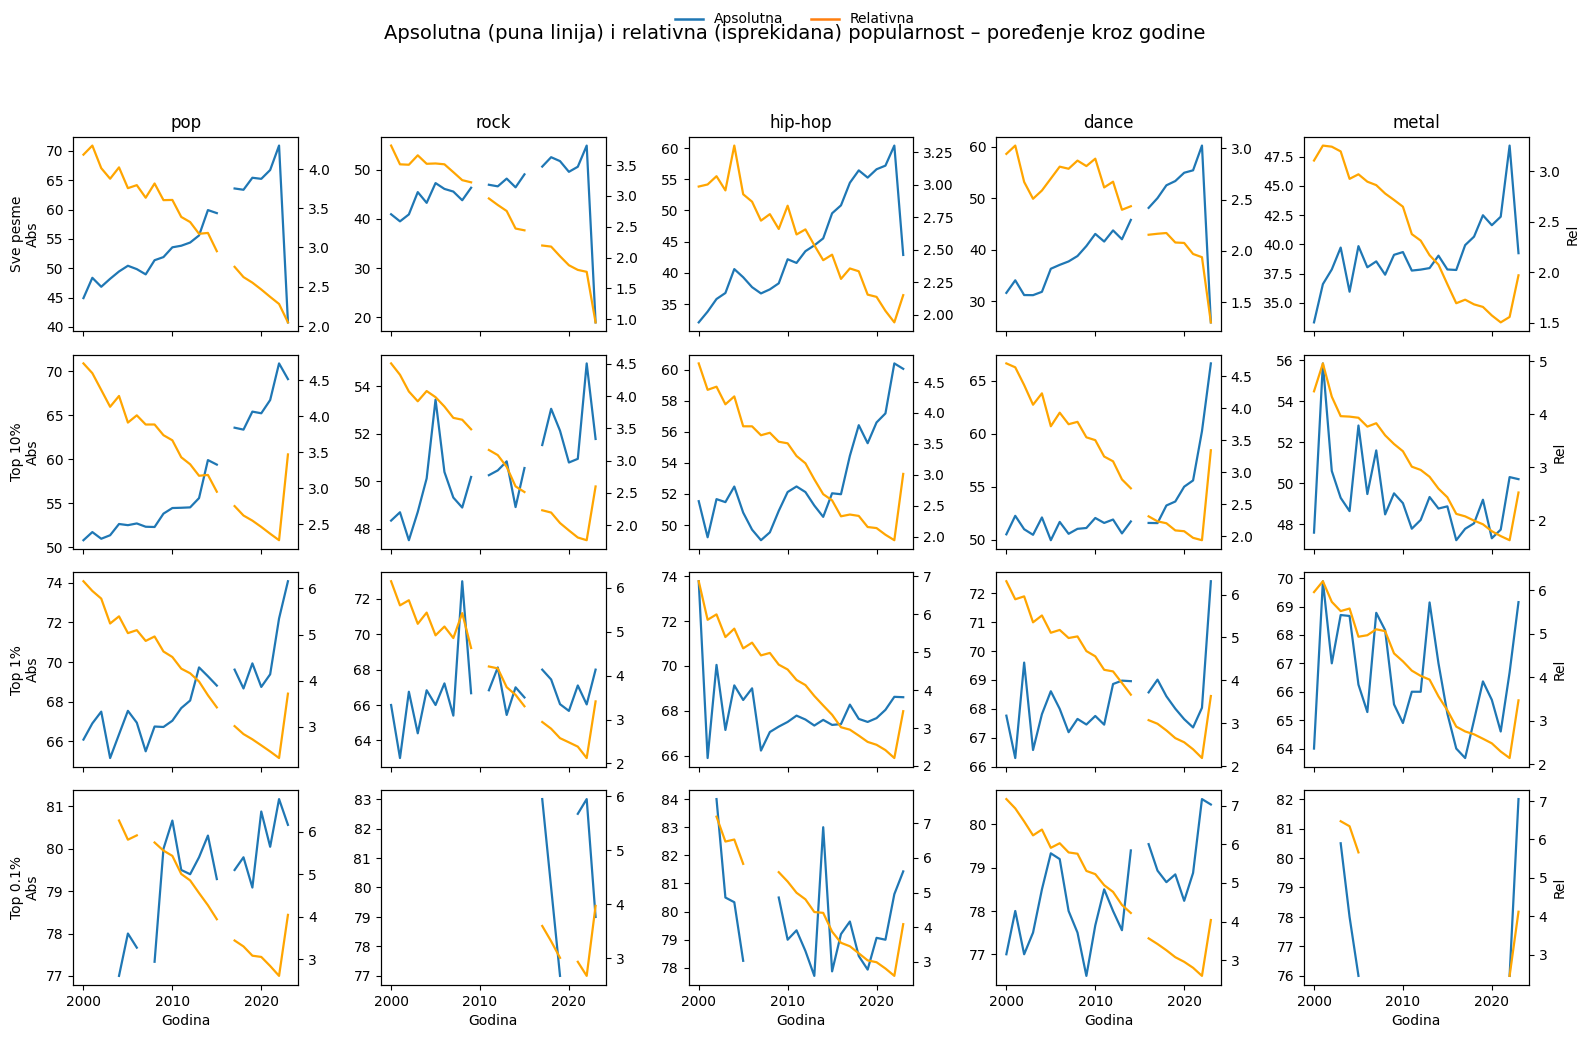

In [147]:
top10   = df_gen[df_gen["popularity"] >= q10]
top01   = df_gen[df_gen["popularity"] >= q01]
top001  = df_gen[df_gen["popularity"] >= q001]

def by_year_genre_mean_abs(d):
    return (d.groupby(["year","genre"])["popularity"]
              .mean()
              .reset_index()
              .rename(columns={"popularity": "avg_pop"}))

def by_year_genre_mean_rel(d):
    return (d.groupby(["year","genre"])["rel_popularity"]
              .mean()
              .reset_index()
              .rename(columns={"rel_popularity": "avg_pop"}))

g_all_abs = by_year_genre_mean_abs(df_gen)
g_10_abs  = by_year_genre_mean_abs(top10)
g_1_abs   = by_year_genre_mean_abs(top01)
g_001_abs = by_year_genre_mean_abs(top001)

K = 5
top_genres_global = (
    g_all_abs.groupby("genre")["avg_pop"]
             .mean()
             .sort_values(ascending=False)
             .head(K).index.tolist()
)

p_all_abs = g_all_abs[g_all_abs["genre"].isin(top_genres_global)].pivot(index="year", columns="genre", values="avg_pop")
p_10_abs  = g_10_abs[g_10_abs["genre"].isin(top_genres_global)].pivot(index="year", columns="genre", values="avg_pop")
p_1_abs   = g_1_abs [g_1_abs ["genre"].isin(top_genres_global)].pivot(index="year", columns="genre", values="avg_pop")
p_001_abs = g_001_abs[g_001_abs["genre"].isin(top_genres_global)].pivot(index="year", columns="genre", values="avg_pop")

g_all_rel = by_year_genre_mean_rel(df_gen)
g_10_rel  = by_year_genre_mean_rel(top10)
g_1_rel   = by_year_genre_mean_rel(top01)
g_001_rel = by_year_genre_mean_rel(top001)

p_all_rel = g_all_rel[g_all_rel["genre"].isin(top_genres_global)].pivot(index="year", columns="genre", values="avg_pop")
p_10_rel  = g_10_rel[g_10_rel["genre"].isin(top_genres_global)].pivot(index="year", columns="genre", values="avg_pop")
p_1_rel   = g_1_rel [g_1_rel ["genre"].isin(top_genres_global)].pivot(index="year", columns="genre", values="avg_pop")
p_001_rel = g_001_rel[g_001_rel["genre"].isin(top_genres_global)].pivot(index="year", columns="genre", values="avg_pop")

tables_abs = [p_all_abs, p_10_abs, p_1_abs, p_001_abs]
tables_rel = [p_all_rel, p_10_rel, p_1_rel, p_001_rel]
row_labels = ["Sve pesme", "Top 10%", "Top 1%", "Top 0.1%"]

rows, cols = 4, len(top_genres_global)
fig, axes = plt.subplots(rows, cols, figsize=(3.2*cols, 2.6*rows), sharex='col')

for c, genre in enumerate(top_genres_global):
    for r, (lbl, tbl_abs, tbl_rel) in enumerate(zip(row_labels, tables_abs, tables_rel)):
        ax = axes[r, c]

        if (genre in tbl_abs.columns):
            ax.plot(tbl_abs.index, tbl_abs[genre], linewidth=1.6, label="Apsolutna")  
        ax.set_title(genre if r == 0 else "")

        ax_r = ax.twinx()
        if (genre in tbl_rel.columns):
            ax_r.plot(tbl_rel.index, tbl_rel[genre], linewidth=1.6, color="orange", label="Relativna")

        if c == 0:
            ax.set_ylabel(f"{lbl}\nAbs")
        else:
            ax.set_ylabel("")
        if c == cols - 1:
            ax_r.set_ylabel("Rel")
        else:
            ax_r.set_ylabel("")

        if r == rows - 1:
            ax.set_xlabel("Godina")
        else:
            ax.set_xlabel("")

handles = [
    Line2D([0], [0], color="C0", linewidth=1.8, label="Apsolutna"),
    Line2D([0], [0], color="C1", linewidth=1.8, label="Relativna"),
]
fig.legend(handles=handles, loc="upper center", ncol=2, frameon=False)

fig.suptitle("Apsolutna (puna linija) i relativna (isprekidana) popularnost – poređenje kroz godine", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

### Poređenje po kategorijama

- `mode` (Dur=1, Mol=0) – da li se popularnost razlikuje?
- `time_signature` – distribucija popularnosti prema taktu.

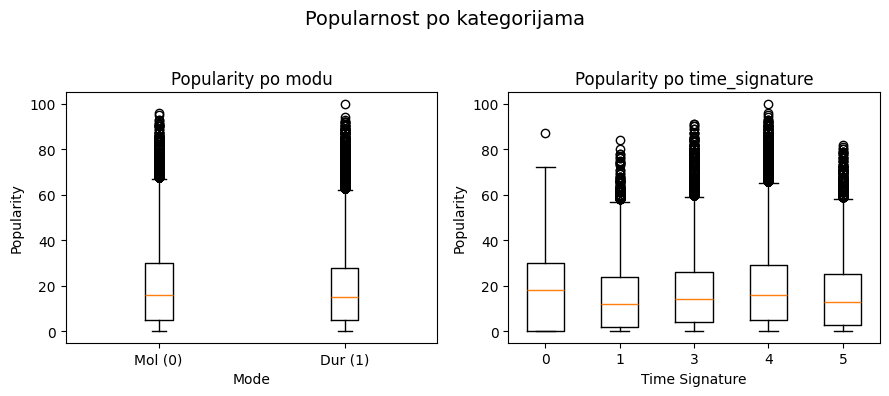

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  

axes[0].boxplot(
    [df.loc[df["mode"] == 0, "popularity"],
     df.loc[df["mode"] == 1, "popularity"]],
    labels=["Mol (0)", "Dur (1)"]
)
axes[0].set_title("Popularity po modu")
axes[0].set_xlabel("Mode")
axes[0].set_ylabel("Popularity")

ts_values = sorted(df["time_signature"].unique())
axes[1].boxplot(
    [df.loc[df["time_signature"] == ts, "popularity"] for ts in ts_values],
    labels=ts_values
)
axes[1].set_title("Popularity po time_signature")
axes[1].set_xlabel("Time Signature")
axes[1].set_ylabel("Popularity")

fig.suptitle("Popularnost po kategorijama", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Mode (Mol vs Dur)**  
Medijane popularnosti su vrlo slične za oba moda (blago više u Dur-u), uz veliki raspon i mnogo outliera ka višim vrednostima. Ovo sugeriše da **modalitet sam po sebi nema snažan efekat** na popularnost.

**Time_signature (0, 1, 3, 4, 5)**  
Medijane su uglavnom slične između metara, sa blagim pomakom naviše kod **4** (najčešći takt). Svi metri imaju dugačak gornji rep (outlieri do ~100), što ukazuje da **vrlo popularne pesme postoje u svim taktovima**. Grupa **0** deluje nestabilno (široki whiskers, malo tačaka) — verovatno mali uzorak ili detekcioni “noise”.

**Zaključak**  
Na nivou deskriptive, **nema jake razlike** u popularnosti po modu i metru; razlike su, ako postoje, **male**. 


### Korelacije između numeričkih karakteristika

Korelaciona matrica pomaže da identifikujemo jake veze.

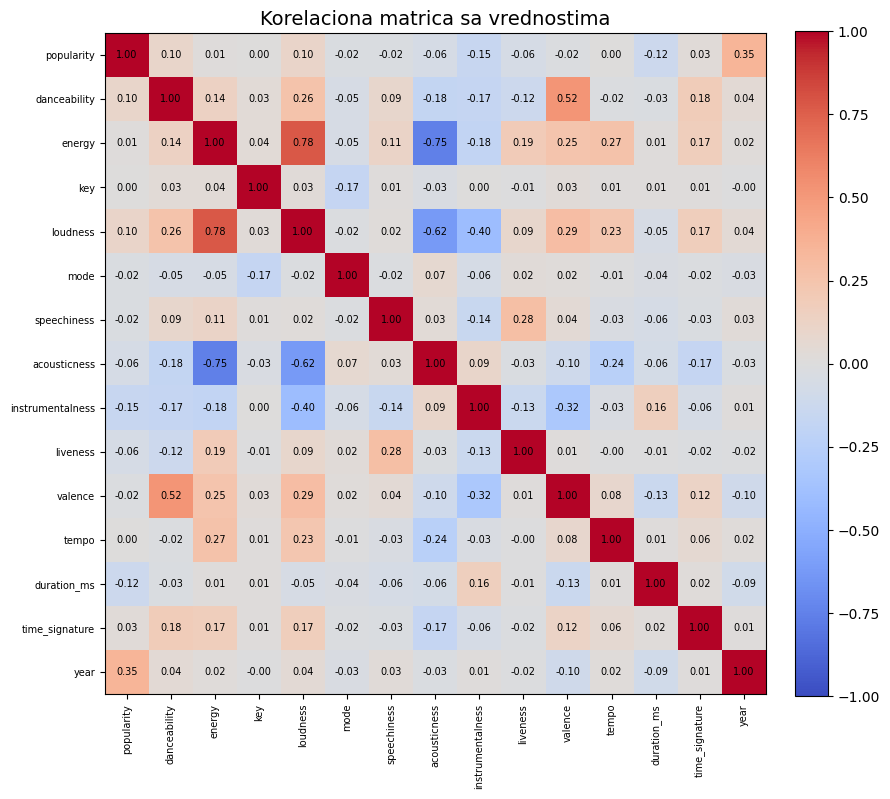


Pozitivne korelacije > 0.5:
danceability ↔ valence: 0.52
energy ↔ loudness: 0.78

Negativne korelacije < -0.5:
energy ↔ acousticness: -0.75
loudness ↔ acousticness: -0.62


In [149]:
num_cols = [
    "popularity","danceability","energy","key","loudness","mode",
    "speechiness","acousticness","instrumentalness","liveness",
    "valence","tempo","duration_ms","time_signature","year"
]

corr = df[num_cols].corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(9, 9))

im = ax.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)

ax.set_xticks(range(len(num_cols)))
ax.set_yticks(range(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=90, fontsize=7)
ax.set_yticklabels(num_cols, fontsize=7)

for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        ax.text(j, i, f"{corr.iat[i,j]:.2f}",
                ha="center", va="center", fontsize=7, color="black")

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title("Korelaciona matrica sa vrednostima", fontsize=14)

plt.tight_layout()
plt.show()

threshold = 0.5
strong_pos = []
strong_neg = []

for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):      
        val = corr.iat[i, j]
        if val > threshold:
            strong_pos.append((num_cols[i], num_cols[j], val))
        elif val < -threshold:
            strong_neg.append((num_cols[i], num_cols[j], val))

print("\nPozitivne korelacije > 0.5:")
for a, b, v in strong_pos:
    print(f"{a} ↔ {b}: {v:.2f}")

print("\nNegativne korelacije < -0.5:")
for a, b, v in strong_neg:
    print(f"{a} ↔ {b}: {v:.2f}")

## Testiranje hipoteza

In [150]:
from scipy import stats
from scipy.stats import chi2_contingency
import seaborn as sns

1) Za test nezavisnosti nad kontingencijom genre_grouped × pop_quantile postavljene su hipoteze: 
- H₀: žanr i diskretizovana popularnost su nezavisni; 
- H₁: postoji zavisnost između žanra i popularnosti. 

chi² = 861149.01, df = 1701, p-value = 0
Minimalna očekivana frekvencija = 13.04

Top 10 pozitivnih reziduala:
 genre_grouped  pop_quantile 
pop            (51.0, 100.0]   243.01
hip-hop        (51.0, 100.0]   216.05
dance          (51.0, 100.0]   169.85
tango          (-0.001, 1.0]   154.82
romance        (-0.001, 1.0]   143.76
grindcore      (-0.001, 1.0]   130.12
breakbeat      (-0.001, 1.0]   122.04
heavy-metal    (-0.001, 1.0]   114.90
indian         (-0.001, 1.0]   113.66
hip-hop        (44.0, 51.0]    104.87
dtype: float64

Top 10 negativnih reziduala:
 genre_grouped  pop_quantile 
gospel         (-0.001, 1.0]   -59.37
alt-rock       (-0.001, 1.0]   -57.48
blues          (-0.001, 1.0]   -56.57
country        (-0.001, 1.0]   -54.42
dance          (-0.001, 1.0]   -52.39
french         (-0.001, 1.0]   -51.49
hardcore       (-0.001, 1.0]   -51.29
german         (-0.001, 1.0]   -50.67
folk           (-0.001, 1.0]   -50.44
k-pop          (-0.001, 1.0]   -50.33
dtype: float64


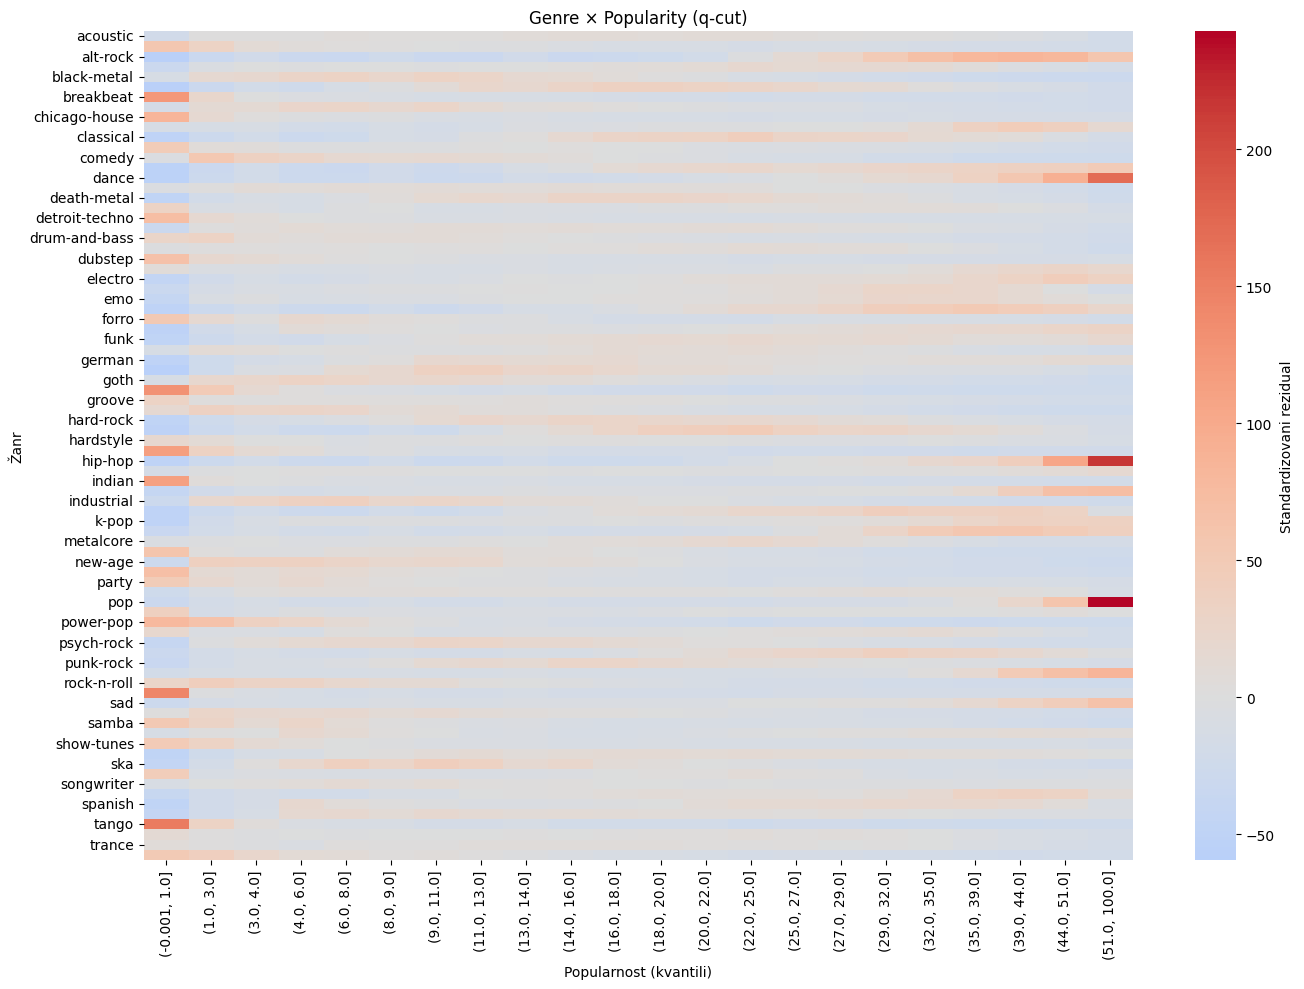

In [151]:
n_quantiles = 25 

df["pop_quantile"] = pd.qcut(df["popularity"], q=n_quantiles, duplicates="drop")
n_bins = df["pop_quantile"].nunique()
min_rows_per_genre = 5 * n_bins

freq = df["genre"].value_counts()
major_genres = freq[freq >= min_rows_per_genre].index

df["genre_grouped"] = df["genre"].where(df["genre"].isin(major_genres), "Other")
ct = pd.crosstab(df["genre_grouped"], df["pop_quantile"])

chi2_stat, p_value, dof, expected = chi2_contingency(ct)

std_resid = (ct - expected) / np.sqrt(expected)
top_pos = std_resid.stack().sort_values(ascending=False).head(10)
top_neg = std_resid.stack().sort_values().head(10)

print(f"chi² = {chi2_stat:.2f}, df = {dof}, p-value = {p_value:.3g}")
print(f"Minimalna očekivana frekvencija = {expected.min():.2f}")
print("\nTop 10 pozitivnih reziduala:\n", top_pos)
print("\nTop 10 negativnih reziduala:\n", top_neg)

# heatmap standardizovanih reziduala (crveno = više pesama od očekivanog, plavo = manje)
plt.figure(figsize=(14, 10))
sns.heatmap(std_resid, cmap="coolwarm", center=0, cbar_kws={"label": "Standardizovani rezidual"})
plt.title("Genre × Popularity (q-cut)")
plt.xlabel("Popularnost (kvantili)")
plt.ylabel("Žanr")
plt.tight_layout()
plt.show()

χ² statistika iznosi 861 149.01 uz df = 1701, što je daleko iznad kritične vrednosti za α = 0.05 (χ²₀.₉₅,1701 ≈ 1 800), pa rezultat ulazi duboko u kritičnu oblast i **H₀ se odbacuje**; dodeljena p-vrednost je praktično nula.

Standardizovani reziduali pokazuju gde je razlika najveća: žanrovi pop, hip-hop, dance imaju znatno više pesama u najvišim binovima popularnosti (pozitivni reziduali), dok gospel, alt-rock, blues, country i dr. imaju manjak pesama u najnižem binu popularnosti (negativni reziduali).

2. Da li se popularnost razlikuje između Dur i Mol (mode: 1 vs 0)?

- H₀: Srednje popularnosti su jednake (Dur = Mol).
- H₁: Razlikuju se.

In [152]:
p_dur = df.loc[df["mode"]==1, "popularity"]
p_mol = df.loc[df["mode"]==0, "popularity"]

t_stat, p_val = stats.ttest_ind(p_dur, p_mol, equal_var=False)
print("t-stat =", t_stat, " p =", p_val)
print("Zaključak:", "Odbacuje se H0 - srednje popularnosti se razlikuju" if p_val < 0.05 else "Ne odbacuje se H0 - srednje popularnosti su iste")

t-stat = -25.48630903005689  p = 3.1604472733383516e-143
Zaključak: Odbacuje se H0 - srednje popularnosti se razlikuju


3. Da li se prosečna popularnost razlikuje kroz godine?
- H₀: Nema linearnog trenda popularnosti po godini.
- H₁: Postoji monotoni trend (Spearman korelacija).

In [153]:
r_s, p_val = stats.spearmanr(df["year"], df["popularity"])
print("Spearman ρ =", r_s, " p =", p_val)
print("Zaključak:", "Odbacuje se H0 - postoji trend" if p_val < 0.05 else "Ne odbacuje se H0 - nema linearnog trenda")

Spearman ρ = 0.34651595313969197  p = 0.0
Zaključak: Odbacuje se H0 - postoji trend


4. Da li su Top 1% pesme “energičnije” od ostalih?

- H₀: Srednja energy je ista u Top 1% i ostatku.
- H₁: Top 1% imaju veću/manju energy.

In [154]:
q01 = df["popularity"].quantile(0.99)
top01  = df["energy"][df["popularity"] >= q01].dropna()
other  = df["energy"][df["popularity"] <  q01].dropna()

t_stat, p_val = stats.ttest_ind(top01, other, equal_var=False)
print("t-stat =", t_stat, " p =", p_val)
print("Zaključak:", "Odbacuje se H0 - top 1% imaju veću/manju energiju" if p_val < 0.05 else "Ne odbacuje se H0 - srednja energija je ista u top 1% i ostatku")

t-stat = 1.0809366748880729  p = 0.2797460971360945
Zaključak: Ne odbacuje se H0 - srednja energija je ista u top 1% i ostatku


5. Da li su danceability i energy povezani?

- H₀: Nema monotone veze.
- H₁: Postoji monotona veza.

In [155]:
rho, p_val = stats.spearmanr(df["danceability"], df["energy"])
print("Spearman ρ =", rho, " p =", p_val)
print("Zaključak:", "Odbacuje se H0 - danceability i energy su povezani" if p_val < 0.05 else "Ne odbacuje se H0 - danceability i energy nisu povezani")

Spearman ρ = 0.0382377377454444  p = 0.0
Zaključak: Odbacuje se H0 - danceability i energy su povezani
